In [1]:
!pip install climpred
!pip install xarray
!pip install xlrd
!pip install pydap

!pip install  xarray dask netCDF4==1.5.4 bottleneck h5py
!pip install numpy scipy matplotlib pandas scikit-learn tqdm 

!apt-get install -y curl grep sed dpkg
!pip install image

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
sed is already the newest version (4.4-2).
curl is already the newest version (7.58.0-2ubuntu3.10).
dpkg is already the newest version (1.19.0.5ubuntu2.3).
grep is already the newest version (3.1-2build1).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
You should consider upgrading via the '/usr/bin/python3 -m pip in

In [2]:
import warnings

import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import os, sys
import image
from PIL import Image, ImageChops , ImageOps


from climpred import HindcastEnsemble
import climpred
xr.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
python-bits: 64
OS: Linux
OS-release: 4.15.0-123-generic
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: C.UTF-8
LOCALE: en_US.UTF-8
libhdf5: 1.10.5
libnetcdf: 4.6.3

xarray: 0.16.1
pandas: 1.1.2
numpy: 1.18.2
scipy: 1.4.1
netCDF4: 1.5.4
pydap: installed
h5netcdf: None
h5py: 2.10.0
Nio: None
zarr: None
cftime: 1.3.0
nc_time_axis: None
PseudoNetCDF: None
rasterio: None
cfgrib: None
iris: None
bottleneck: 1.3.2
dask: 2.30.0
distributed: None
matplotlib: 3.2.1
cartopy: None
seaborn: None
numbagg: None
pint: None
setuptools: 46.1.3
pip: 20.2.3
conda: None
pytest: None
IPython: 7.16.1
sphinx: None


xarray: 0.16.1
pandas: 1.1.1
numpy: 1.19.1
scipy: 1.5.2
netCDF4: 1.5.4
pydap: None
h5netcdf: None
h5py: 2.10.0
Nio: None
zarr: None
cftime: 1.2.1
nc_time_axis: None
PseudoNetCDF: None
rasterio: None
cfgrib: None
iris: None
bottleneck: 1.3.2
dask: 2.25.0
distributed: 2.25.0
matplotlib: 3.3.1
cartopy: None
seaborn: 0.11.0
numbagg: None
pint: None
setuptools: 50.3.0
pip: 20.2.2
conda: 4.9.2
pytest: None
IPython: 5.8.0
sphinx: None

In [3]:
regions=['Республика Адыгея',
'Республика Алтай',
'Амурская область',
'Архангельская область',
'Астраханская область',
'Республика Башкортостан',
'Белгородская область',
'Брянская область',
'Республика Бурятия',
'Чеченская республика',
'Челябинская область',
'Чукотский автономный округ',
'Чувашская республика',
'Республика Дагестан',
'Республика Алтай',
'Республика Ингушетия',
'Иркутская область',
'Ивановская область',
'Кабардино-Балкарская республика',
'Карачаево-Черкесская республика',
'Краснодарский край',
'Кемеровская область',
'Калужская область',
'Хабаровский край',
'Республика Карелия',
'Республика Хакасия',
'Республика Калмыкия',
'Ханты-Мансийский автономный округ',
'Калининградская область',
'Республика Коми',
'Камчатский край',
'Курская область',
'Костромская область',
'Курганская область',
'Кировская область',
'Красноярский край',
'Ленинградская область',
'Липецкая область',
'Москва',
'Республика Марий Эл',
'Магаданская область',
'Мурманская область',
'Республика Мордовия',
'Московская область',
'Новгородская область',
'Ненецкий автономный округ',
'Республика Северная Осетия — Алания',
'Новосибирская область',
'Нижегородская область',
'Оренбургская область',
'Орловская область',
'Омская область',
'Пермский край',
'Приморский край',
'Псковская область',
'Пензенская область',
'Ростовская область',
'Рязанская область',
'Самарская область',
'Республика Саха (Якутия)',
'Сахалинская область',
'Смоленская область',
'Санкт-Петербург',
'Саратовская область',
'Ставропольский край',
'Свердловская область',
'Тамбовская область',
'Томская область',
'Тульская область',
'Республика Татарстан',
'Республика Тыва',
'Тверская область',
'Тюменская область',
'Удмуртская республика',
'Ульяновская область',
'Волгоградская область',
'Владимирская область',
'Ямало-Ненецкий автономный округ',
'Вологодская область',
'Воронежская область',
'Ярославская область',
'Еврейская автономная область',
'Забайкальский край']

In [4]:
def decode_cf(ds, time_var):
    if ds[time_var].attrs['calendar'] == '360':
        ds[time_var].attrs['calendar'] = '360_day'
    ds = xr.decode_cf(ds, decode_times=True)
    return ds

In [5]:
#[41, 20], [82, 190]

In [6]:
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NCEP-CFSv2/.FORECAST/.PENTAD_SAMPLES/.MONTHLY/.tref/X/20.0/190.0/RANGEEDGES/Y/41.0/82.0/RANGEEDGES/dods'

fullda = decode_cf(xr.open_dataset(url, decode_times=False),'S')
fullda=fullda.rename({'S': 'init','L': 'lead','M': 'member', 'X': 'lon', 'Y': 'lat'})
fullda['lead']=(fullda['lead']-0.5).astype('int')
fullda['init']=pd.to_datetime(fullda.init.values.astype(str))
fullda

<xarray.Dataset>
Dimensions:  (init: 116, lat: 42, lead: 10, lon: 171, member: 28)
Coordinates:
  * init     (init) datetime64[ns] 2011-04-01 2011-05-01 ... 2020-11-01
  * member   (member) float32 1.0 2.0 3.0 4.0 5.0 ... 24.0 25.0 26.0 27.0 28.0
  * lead     (lead) int64 0 1 2 3 4 5 6 7 8 9
  * lon      (lon) float32 20.0 21.0 22.0 23.0 24.0 ... 187.0 188.0 189.0 190.0
  * lat      (lat) float32 41.0 42.0 43.0 44.0 45.0 ... 78.0 79.0 80.0 81.0 82.0
Data variables:
    tref     (init, lead, member, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

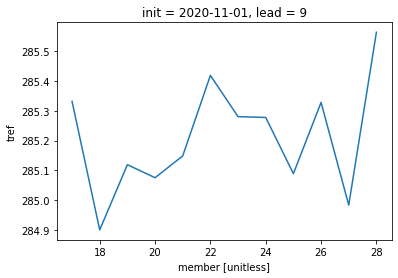

In [7]:
fullda.sel(init=fullda['init'][-1],lead=9).mean(['lat','lon']).tref.plot()

In [8]:
#.sel(init='2020-11-01')
data_mean=fullda.copy().mean(['member'])
#data_mean=fullda.copy().sel(member=22.0)

data_mean

<xarray.Dataset>
Dimensions:  (init: 116, lat: 42, lead: 10, lon: 171)
Coordinates:
  * init     (init) datetime64[ns] 2011-04-01 2011-05-01 ... 2020-11-01
  * lead     (lead) int64 0 1 2 3 4 5 6 7 8 9
  * lon      (lon) float32 20.0 21.0 22.0 23.0 24.0 ... 187.0 188.0 189.0 190.0
  * lat      (lat) float32 41.0 42.0 43.0 44.0 45.0 ... 78.0 79.0 80.0 81.0 82.0
Data variables:
    tref     (init, lead, lat, lon) float32 284.0106 282.114 ... 273.26566

In [9]:
#287.00247 284.6058 ... 275.71667


In [10]:
data_m0=data_mean.sel(init='2020-11-01',lead=0)-data_mean.sel(init='2019-11-01',lead=0)
data_m1=data_mean.sel(init='2020-11-01',lead=1)-data_mean.sel(init='2019-12-01',lead=0)
data_m2=data_mean.sel(init='2020-11-01',lead=2)-data_mean.sel(init='2020-01-01',lead=0)
data_m3=data_mean.sel(init='2020-11-01',lead=3)-data_mean.sel(init='2020-02-01',lead=0)
data_m4=data_mean.sel(init='2020-11-01',lead=4)-data_mean.sel(init='2020-03-01',lead=0)
data_m5=data_mean.sel(init='2020-11-01',lead=5)-data_mean.sel(init='2020-04-01',lead=0)
data_m6=data_mean.sel(init='2020-11-01',lead=6)-data_mean.sel(init='2020-05-01',lead=0)
data_m7=data_mean.sel(init='2020-11-01',lead=7)-data_mean.sel(init='2020-06-01',lead=0)
data_m8=data_mean.sel(init='2020-11-01',lead=8)-data_mean.sel(init='2020-07-01',lead=0)
data_m9=data_mean.sel(init='2020-11-01',lead=9)-data_mean.sel(init='2020-08-01',lead=0)

In [11]:
data_list=[data_m0,data_m1,data_m2,data_m3,data_m4,data_m5,data_m6,data_m7,data_m8,data_m9]


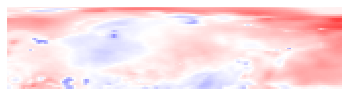

In [12]:
  
    
for i in range(len(data_list)):
    data_temp=data_list[i].tref.values
    img = plt.imshow(data_temp, interpolation='nearest', origin = 'lower',vmin=-7, vmax=7)
    img.set_cmap('bwr')
    plt.axis('off')
    plt.savefig("./prognoz/mask"+str(i)+".png", bbox_inches='tight')
    
    
    img = Image.open("./prognoz/mask"+str(i)+".png") # image extension *.png,*.jpg
    new_width  = 1224
    new_height = 761
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save("./prognoz/mask"+str(i)+".png")


In [13]:
dir(Image)

['ADAPTIVE',
 'AFFINE',
 'ANTIALIAS',
 'BICUBIC',
 'BILINEAR',
 'BOX',
 'CONTAINER',
 'CUBIC',
 'Callable',
 'DECODERS',
 'DEFAULT_STRATEGY',
 'DecompressionBombError',
 'DecompressionBombWarning',
 'ENCODERS',
 'EXTENSION',
 'EXTENT',
 'Exif',
 'FASTOCTREE',
 'FILTERED',
 'FIXED',
 'FLIP_LEFT_RIGHT',
 'FLIP_TOP_BOTTOM',
 'FLOYDSTEINBERG',
 'HAMMING',
 'HUFFMAN_ONLY',
 'ID',
 'Image',
 'ImageMode',
 'ImagePointHandler',
 'ImageTransformHandler',
 'LANCZOS',
 'LIBIMAGEQUANT',
 'LINEAR',
 'MAXCOVERAGE',
 'MAX_IMAGE_PIXELS',
 'MEDIANCUT',
 'MESH',
 'MIME',
 'MODES',
 'MutableMapping',
 'NEAREST',
 'NONE',
 'NORMAL',
 'OPEN',
 'ORDERED',
 'PERSPECTIVE',
 'Path',
 'QUAD',
 'RASTERIZE',
 'RLE',
 'ROTATE_180',
 'ROTATE_270',
 'ROTATE_90',
 'SAVE',
 'SAVE_ALL',
 'SEQUENCE',
 'TRANSPOSE',
 'TRANSVERSE',
 'TiffTags',
 'USE_CFFI_ACCESS',
 'UnidentifiedImageError',
 'WEB',
 '_E',
 '_ENDIAN',
 '_MAPMODES',
 '_MODEINFO',
 '_MODE_CONV',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loa

In [14]:
for i in range(len(data_list)):
    for j in regions:
        img_prognoz = Image.open("./prognoz/mask"+str(i)+".png") # image extension *.png,*.jpg
        img_mask = Image.open( "./mask/"+j+".png") # image extension *.png,*.jpg
        
        til = Image.new("RGBA",(1224,761))
        til.paste(img_prognoz,ImageOps.invert(img_mask.convert("L")))        
        til.save("./img/img_"+j+'_'+str(i)+".png")

In [15]:
!pip install folium
!pip install ipyleaflet

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
data_list[i].tref.values.max()

5.243164

In [17]:
import folium
V=[]
Heat=[]

m = folium.Map(location=[60, 110],  min_zoom=1, max_zoom=12, zoom_start=2)
for i in range(len(regions)):
    V.append(folium.FeatureGroup(name = str(regions[i]), show=False))
    Heat.append(folium.raster_layers.ImageOverlay(
        image="./img/img_"+regions[i]+"_1.png",  
        bounds=[[41, 20], [82, 190]],
        opacity=0.8,
        interactive=False,
        cross_origin=False,
        overlay=True,
        zindex=1
    ))
    
    V[i].add_child(Heat[i]) 
    
    m.add_child(V[i])
#Добавляем контроль слоев


#folium.LayerControl(collapsed=False).add_to(m)
m.save("map_2019B.html")
m

NameError: name 'prognoz' is not defined